# Load Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/Thesis/Paper2

/content/drive/MyDrive/Thesis/Paper2


# Imports + Load Data

In [4]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import makedata        # to get the CIFAR10 data in the required format
import models

In [5]:
totalClass = 7
shufflePixels = True
shuffleLabels = False

In [6]:
# Load data
x_train, y_train, x_test, y_test, a, b = makedata.cifar(totalClass, shufflePixels)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
(35000, 32, 32, 3)
(35000, 32, 32, 3)
(35000, 7)
(7000, 32, 32, 3)
(7000, 7)


Populating the interactive namespace from numpy and matplotlib


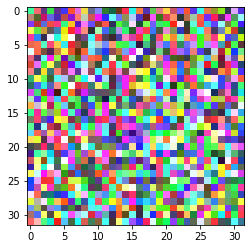

In [7]:
# Check Image data
im = x_train[88]
%pylab inline
imgplot = plt.imshow(im)
plt.show()

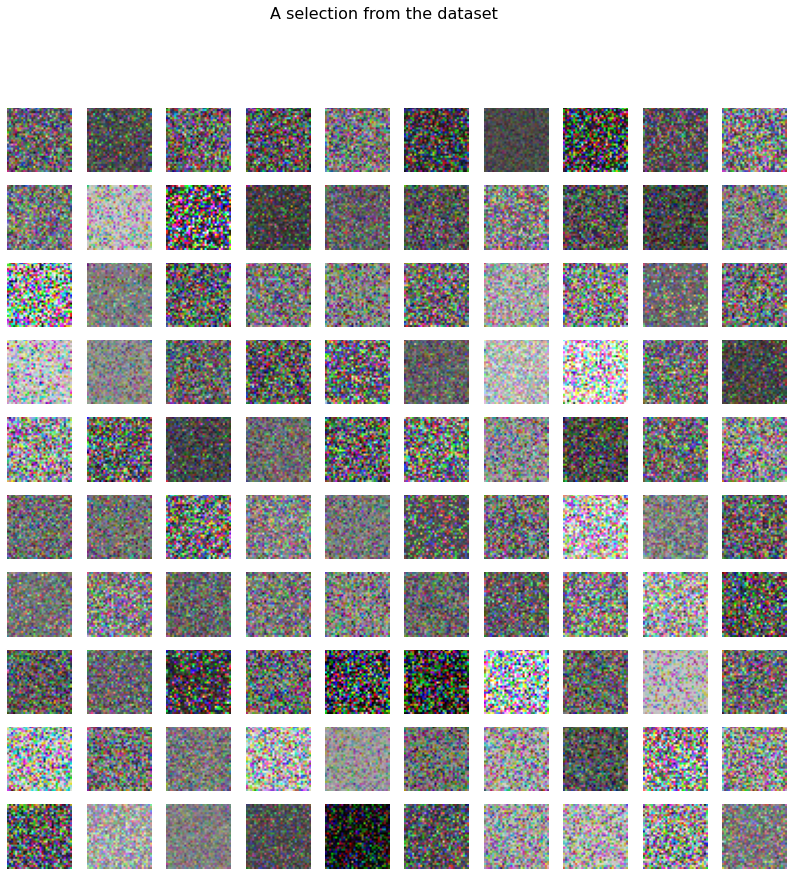

In [8]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(14, 14))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[idx], cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the dataset", fontsize=16)

#VGG16

In [9]:
vgg16 = models.vgg16(totalClass)
vgg16.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [10]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
69/69 [==============================] - 12s 37ms/step - loss: 1.9529 - accuracy: 0.1429
test loss, test acc: [1.952898621559143, 0.142914280295372]
Evaluate on test data
14/14 [==============================] - 1s 97ms/step - loss: 1.9530 - accuracy: 0.1423
test loss, test acc: [1.9530110359191895, 0.14228571951389313]


In [11]:
vggResults = vgg16.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
350/350 [==============================] - 13s 33ms/step - loss: 1.9140 - accuracy: 0.1911 - val_loss: 1.8916 - val_accuracy: 0.1990
Epoch 2/250
350/350 [==============================] - 11s 30ms/step - loss: 1.8835 - accuracy: 0.2134 - val_loss: 1.8626 - val_accuracy: 0.2411
Epoch 3/250
350/350 [==============================] - 11s 30ms/step - loss: 1.8741 - accuracy: 0.2274 - val_loss: 1.9049 - val_accuracy: 0.2049
Epoch 4/250
350/350 [==============================] - 11s 30ms/step - loss: 1.8662 - accuracy: 0.2358 - val_loss: 1.8587 - val_accuracy: 0.2489
Epoch 5/250
350/350 [==============================] - 11s 32ms/step - loss: 1.8581 - accuracy: 0.2450 - val_loss: 1.8492 - val_accuracy: 0.2569
Epoch 6/250
350/350 [==============================] - 11s 32ms/step - loss: 1.8513 - accuracy: 0.2487 - val_loss: 1.8418 - val_accuracy: 0.2617
Epoch 7/250
350/350 [==============================] - 11s 30ms/step - loss: 1.8446 - accuracy: 0.2524 - val_loss: 1.8256 - val_ac

In [12]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
69/69 [==============================] - 2s 30ms/step - loss: 0.0078 - accuracy: 0.9974
test loss, test acc: [0.007803565356880426, 0.9973999857902527]
Evaluate on test data
14/14 [==============================] - 0s 30ms/step - loss: 9.1439 - accuracy: 0.1733
test loss, test acc: [9.143903732299805, 0.17328570783138275]


# Small

In [13]:
small = models.small(totalClass)
small.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
69/69 [==============================] - 1s 7ms/step - loss: 18.9072 - accuracy: 0.1393
test loss, test acc: [18.907245635986328, 0.13925714790821075]
Evaluate on test data
14/14 [==============================] - 0s 13ms/step - loss: 18.9581 - accuracy: 0.1386
test loss, test acc: [18.9581298828125, 0.13857142627239227]


In [15]:
smallResults = small.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=250, 
                         validation_data=(x_test, y_test))

Epoch 1/250
350/350 [==============================] - 4s 8ms/step - loss: 3.8786 - accuracy: 0.1541 - val_loss: 1.9318 - val_accuracy: 0.1859
Epoch 2/250
350/350 [==============================] - 3s 7ms/step - loss: 1.9299 - accuracy: 0.1776 - val_loss: 1.8922 - val_accuracy: 0.2180
Epoch 3/250
350/350 [==============================] - 3s 7ms/step - loss: 1.9147 - accuracy: 0.1886 - val_loss: 1.8973 - val_accuracy: 0.2106
Epoch 4/250
350/350 [==============================] - 3s 7ms/step - loss: 1.9071 - accuracy: 0.1953 - val_loss: 1.8876 - val_accuracy: 0.2160
Epoch 5/250
350/350 [==============================] - 2s 7ms/step - loss: 1.9041 - accuracy: 0.1958 - val_loss: 1.8793 - val_accuracy: 0.2163
Epoch 6/250
350/350 [==============================] - 2s 7ms/step - loss: 1.8999 - accuracy: 0.1991 - val_loss: 1.8839 - val_accuracy: 0.2179
Epoch 7/250
350/350 [==============================] - 3s 7ms/step - loss: 1.8958 - accuracy: 0.2025 - val_loss: 1.8793 - val_accuracy: 0.2237

In [16]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
69/69 [==============================] - 1s 7ms/step - loss: 1.5249 - accuracy: 0.4338
test loss, test acc: [1.5248628854751587, 0.43377143144607544]
Evaluate on test data
14/14 [==============================] - 0s 7ms/step - loss: 2.0352 - accuracy: 0.1996
test loss, test acc: [2.035243272781372, 0.199571430683136]


#tNet

In [17]:
tNet = models.tNet(totalClass)
tNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [18]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
69/69 [==============================] - 4s 43ms/step - loss: 3.5591 - accuracy: 0.1416
test loss, test acc: [3.559055805206299, 0.14162857830524445]
Evaluate on test data
14/14 [==============================] - 1s 75ms/step - loss: 3.5615 - accuracy: 0.1426
test loss, test acc: [3.561535596847534, 0.14257143437862396]


In [19]:
tNetResults = tNet.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
350/350 [==============================] - 16s 41ms/step - loss: 1.9837 - accuracy: 0.2284 - val_loss: 1.8704 - val_accuracy: 0.2519
Epoch 2/250
350/350 [==============================] - 14s 41ms/step - loss: 1.8178 - accuracy: 0.2745 - val_loss: 1.8363 - val_accuracy: 0.2571
Epoch 3/250
350/350 [==============================] - 14s 39ms/step - loss: 1.7255 - accuracy: 0.3226 - val_loss: 1.8810 - val_accuracy: 0.2460
Epoch 4/250
350/350 [==============================] - 14s 41ms/step - loss: 1.5757 - accuracy: 0.3993 - val_loss: 1.9622 - val_accuracy: 0.2379
Epoch 5/250
350/350 [==============================] - 14s 39ms/step - loss: 1.3631 - accuracy: 0.4988 - val_loss: 2.0791 - val_accuracy: 0.2240
Epoch 6/250
350/350 [==============================] - 14s 40ms/step - loss: 1.1298 - accuracy: 0.5972 - val_loss: 2.2453 - val_accuracy: 0.2259
Epoch 7/250
350/350 [==============================] - 14s 39ms/step - loss: 0.8872 - accuracy: 0.6961 - val_loss: 2.4917 - val_ac

In [20]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
69/69 [==============================] - 3s 40ms/step - loss: 0.0014 - accuracy: 0.9998
test loss, test acc: [0.0013878492172807455, 0.9998000264167786]
Evaluate on test data
14/14 [==============================] - 1s 40ms/step - loss: 6.1341 - accuracy: 0.2174
test loss, test acc: [6.134145259857178, 0.2174285650253296]


# ConvNet

In [24]:
convNet = models.convNet(totalClass)
convNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [25]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
69/69 [==============================] - 4s 47ms/step - loss: 2.5902 - accuracy: 0.1441
test loss, test acc: [2.5902187824249268, 0.14414285123348236]
Evaluate on test data
14/14 [==============================] - 1s 46ms/step - loss: 2.6050 - accuracy: 0.1439
test loss, test acc: [2.6050188541412354, 0.14385713636875153]


In [26]:
convNetResults = convNet.fit(x_train,y_train,
                             batch_size=100,
                             epochs=250,
                             validation_data=(x_test, y_test))

Epoch 1/250
350/350 [==============================] - 15s 40ms/step - loss: 1.8720 - accuracy: 0.2354 - val_loss: 1.8462 - val_accuracy: 0.2529
Epoch 2/250
350/350 [==============================] - 14s 40ms/step - loss: 1.8320 - accuracy: 0.2570 - val_loss: 1.8242 - val_accuracy: 0.2573
Epoch 3/250
350/350 [==============================] - 14s 40ms/step - loss: 1.8274 - accuracy: 0.2545 - val_loss: 1.8079 - val_accuracy: 0.2704
Epoch 4/250
350/350 [==============================] - 14s 40ms/step - loss: 1.8228 - accuracy: 0.2570 - val_loss: 1.8146 - val_accuracy: 0.2680
Epoch 5/250
350/350 [==============================] - 14s 39ms/step - loss: 1.8201 - accuracy: 0.2580 - val_loss: 1.8093 - val_accuracy: 0.2674
Epoch 6/250
350/350 [==============================] - 14s 40ms/step - loss: 1.8179 - accuracy: 0.2600 - val_loss: 1.8126 - val_accuracy: 0.2684
Epoch 7/250
350/350 [==============================] - 14s 40ms/step - loss: 1.8164 - accuracy: 0.2595 - val_loss: 1.8024 - val_ac

In [27]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
69/69 [==============================] - 3s 47ms/step - loss: 0.0117 - accuracy: 0.9954
test loss, test acc: [0.011694061569869518, 0.9954285621643066]
Evaluate on test data
14/14 [==============================] - 1s 46ms/step - loss: 5.3994 - accuracy: 0.2213
test loss, test acc: [5.399436950683594, 0.22128571569919586]


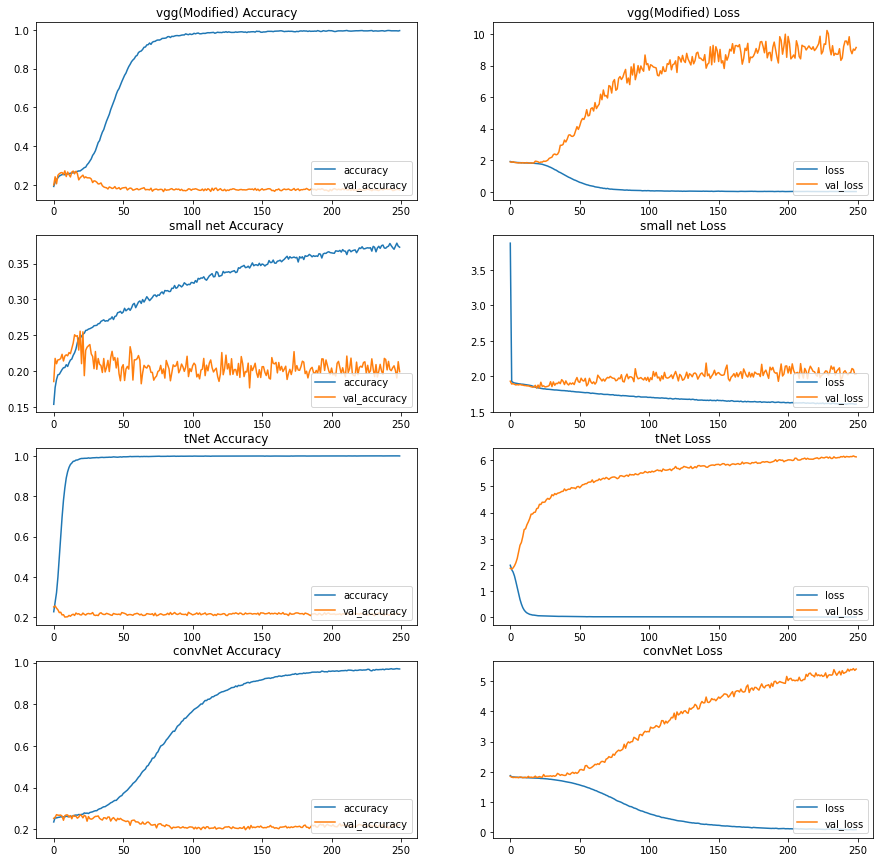

In [28]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
i = 0
name = ['vgg(Modified)', 'small net', 'tNet', 'convNet']
for history in [vggResults, smallResults, tNetResults, convNetResults]:
    axs[i, 0].set_title(name[i]+" Accuracy", fontsize=12)
    axs[i, 0].plot(history.history['accuracy'], label='accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    #axs[i, 0].xlabel('Epoch')
    #axs[i, 0].ylabel('Accuracy')
    #axs[i, 0].ylim([0.5, 1])
    axs[i, 0].legend(loc='lower right')

    axs[i, 1].set_title(name[i]+" Loss", fontsize=12)
    axs[i, 1].plot(history.history['loss'], label='loss')
    axs[i, 1].plot(history.history['val_loss'], label = 'val_loss')
    #axs[i, 1].xlabel('Epoch')
    #axs[i, 1].ylabel('Loss')
    #axs[i, 1].ylim([0.0, 4.0])
    axs[i, 1].legend(loc='lower right')
    i = i + 1
